## Trường Đại Học Khoa Học Tự Nhiên
### Khoa Công Nghệ Thông Tin

Môn học: Lập trình song song ứng dụng

Lớp: CQ2017/1

## ĐỒ ÁN MÔN HỌC
### Đề tài: Song song hoá phân đoạn ảnh bằng phương pháp K-means

**Giáo viên hướng dẫn**: Th.S Trần Trung Kiên

**Danh sách thành viên nhóm:**

| STT| MSSV | Thành viên |
| --- | --- | --- |
| 1 | 1712117 | Nguyễn Huỳnh Thảo Nhi |   
| 2 | 1712713 | Lê Bá Quyền |   
| 3 | 1712775 | Nguyễn Lê Trường Thành |   

### 1.  Mô tả ứng dụng:

#### Phân đoạn ảnh - Image Segmentation


- Phân vùng ảnh là một quá trình gán nhãn (assigning a lablel) cho mỗi điểm ảnh trong một bức ảnh, các điểm ảnh trong cùng một nhãn sẽ có những đặc tính giống nhau về màu sắc, cường độ hoặc kết cấu của ảnh.

 - Mục tiêu của phân đoạn là đơn giản hóa và thay đổi hình thành một thứ có ý nghĩa và dễ phân tích hơn

- **Ứng dụng**: Phân đoạn đối tượng trong video bằng phương pháp K-means.
    - **Input**: Video đầu vào thuộc định dạng mp4.
    - **Output**: Video đầu ra đã được phân đoạn từng đối tượng.
    - **Ý nghĩa của ứng dụng**:
        - Xe tự lái: Xác định đường, xe ô tố, người đi bộ,... để hỗ trợ xe tự lái
        - Y học:  chụp CT , chụp MRI , chụp X-Quang,...
        - Giao thông: 
        - Hệ thống giám sát...

- **Lý do cần tăng tốc**:
    - Tốc độ của thuật toán tuần tự rất chậm đối với video lẫn ảnh.

- **Tiềm năng song song**:
    - Số lượng pixel ảnh lớn và hoạt động được xử lí độc lập nhau.
    - Xử lí đồng thời nhiều frame ảnh 1 lúc để giảm thời gian chạy.

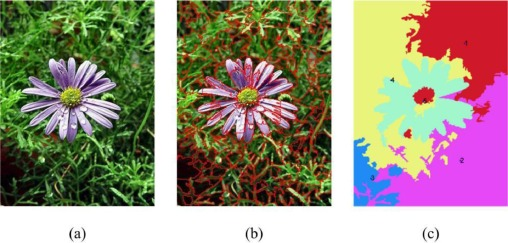

### 2. Cài đặt tuần tự

#### 2.1. Thiết kế

#### Thuật toán phân cụm - K-means Algorithm

![alt](https://3.bp.blogspot.com/-NMrDyo4_ySg/XDqlicW58WI/AAAAAAAAERI/bWXciHyrL_UzlGV2JSkB3D3iCKTtKnyYACLcBGAs/s1600/main.jpg)

- K-Means là thuật toán rất quan trọng và được sử dụng phổ biến trong kỹ thuật phân cụm. Tư tưởng chính của thuật toán K-Means là tìm cách phân nhóm các đối tượng (objects) đã cho vào K cụm (K là số các cụm được xác đinh trước, K nguyên dương) sao cho tổng bình phương khoảng cách giữa các đối tượng đến tâm nhóm (centroid ) là nhỏ nhất.

#### Tóm tắt thuật toán:

- **Input**: Dữ liệu X và số lượng cluster cần tìm K

- **Output**: Các center M và label vector cho từng điểm dữ liệu Y
    - **Bước 1**: Chọn K điểm bất kỳ làm các center ban đầu.
    - **Bước 2**: Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất.
    - **Bước 3**: Nếu việc gán dữ liệu vào từng cluster ở bước 2 không thay đổi so với vòng lặp   trước nó thì ta dừng thuật toán.
    - **Bước 4**: Cập nhật center cho từng cluster bằng cách lấy trung bình cộng của tất các các điểm dữ liệu đã được gán vào cluster đó sau bước 2.
    - **Bước 5**: Quay lại bước 2.

#### Tính độ tương đồng giữa 2 pixels

- **Công thức tính khoảng cách Euclidean:**

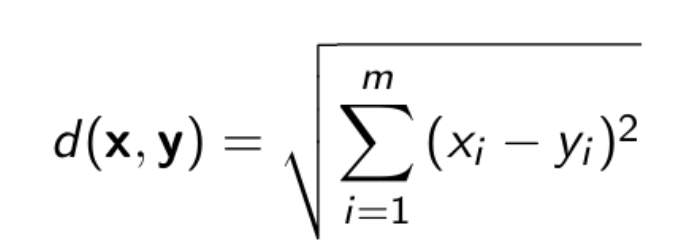

#### Xác định tham số K bằng phương pháp Elbow

- **Công thức**: 

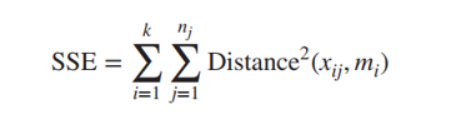

SSE được tính là tổng các khoảng cách tính từ các điểm trong cluster đến điểm trung tâm Centroid của cluster, tính tất cả các cluster, dựa theo công thức Euclidean

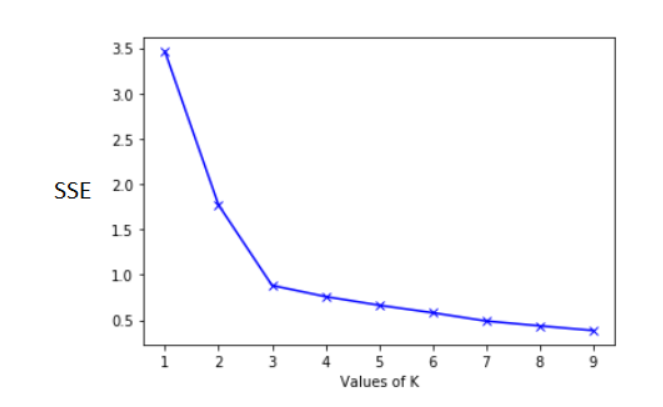

Giải thích: Elbow method dựa trên giả định khi càng có nhiều cluster, thì có nghĩa các điểm dữ liệu giống nhau đã được gom cụm, mỗi cụm sẽ chỉ có ít điểm dữ liệu bên trong, và những điểm này sẽ ko nằm xa nhau, do đó SSE sẽ giảm, khi k tăng. Tuy nhiên khi k càng tăng chúng ta sẽ càng có nhiều cluster cần phân tích, dẫn đến không hiệu quả. Do đó chúng ta nên chon số k mà ở đó SSE bắt đầu giảm đều. Đây được xem là quy tắc chung khi sử dụng elbow method.

#### Phân vùng video bằng thuật toán Kmeans

- Đầu tiên ta sẽ phân tách 1 video thành nhiều frame ảnh

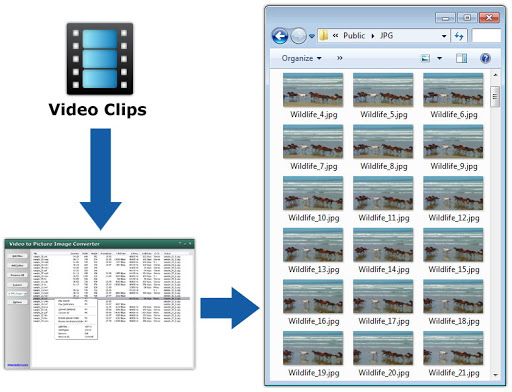

- Sau đó ta sẽ xử lí phân vùng cho từng ảnh riêng lẻ

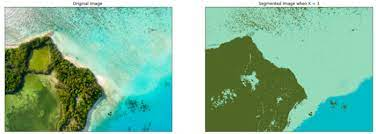

- Cuối cùng ta lại gộp các ảnh lại để thành 1 video hoàn chỉnh

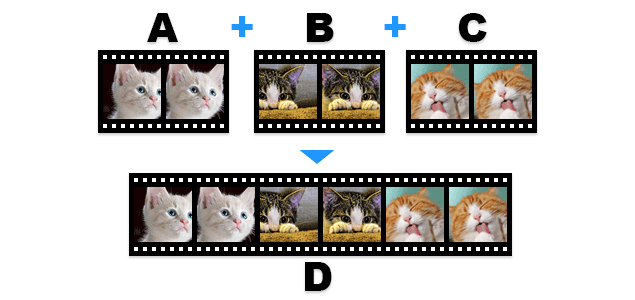

### Demo kết quả thuật toán tuần tự

- Ảnh input: kích thước 1000 x 562

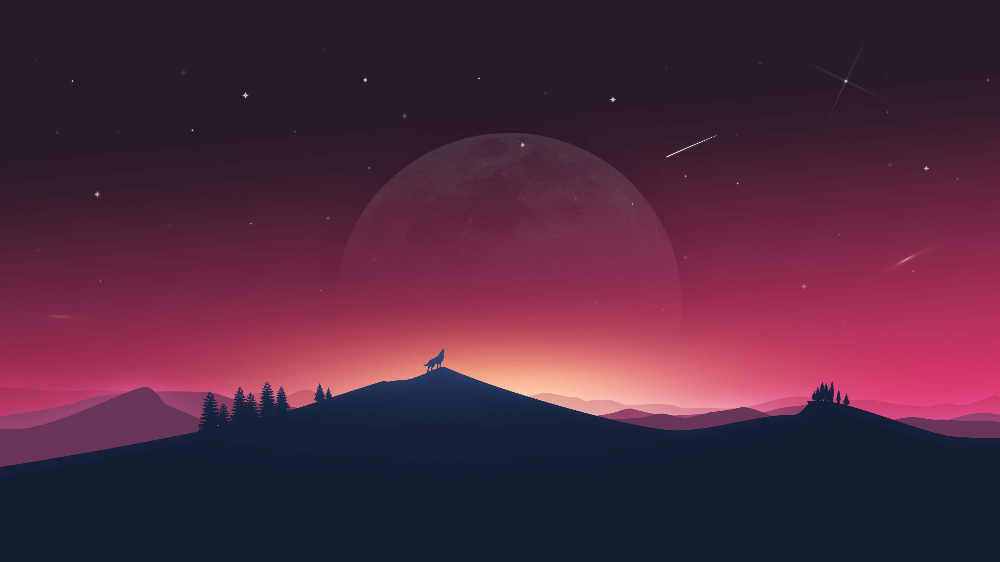

- Biểu đồ thể hiện SSE với k từ 1 đến 10

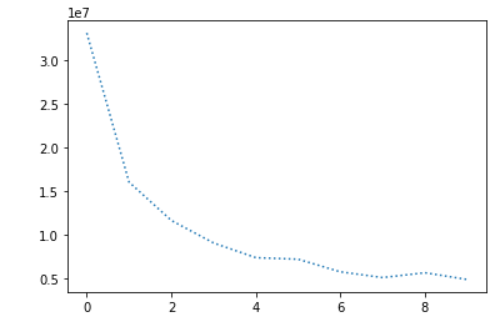

Sau khi áp dụng thuật toán Kmeans với k = 3, thời gian xử lí 60 giây

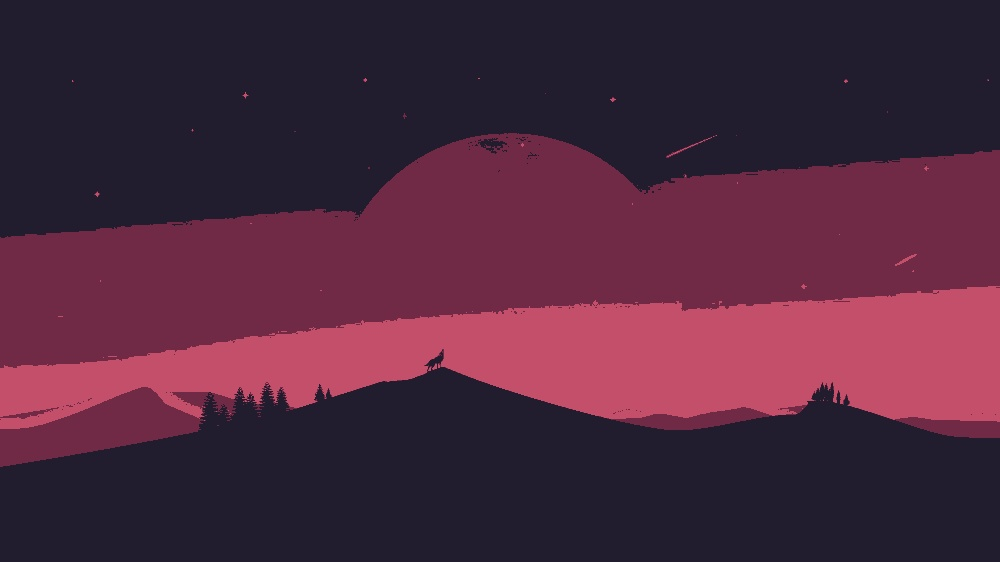

Video inpupt: độ dài khoảng 4 giây, kích thước 480 x 480 , 10 frame/s (xấp xỉ 40 ảnh tổng cộng)

Sau khi áp dụng thuật toán Kmeans với k = 3, thời gian xử lí 30 phút

### 4. Cài đặt thuật toán song song

### 5. Thảo luận

### 6. Tham khảo

[1]. https://www.researchgate.net/publication/276040112_Parallel_K-Means_Algorithm_for_Shared_Memory_Multiprocessors

[2]. https://qastack.vn/stats/81481/why-does-k-means-clustering-algorithm-use-only-euclidean-distance-metric

[3]. https://bigdatauni.com/tin-tuc/cac-phuong-phap-danh-gia-trong-thuat-toan-clustering.html